# Sentiment analysis with Logistic Regression

### Some plotting functions

In [1]:
# Importing packages
from matplotlib import pyplot as plt
import numpy as np
import random
import utils

In [2]:
import numpy as np
features = np.array([[1,0],[0,2],[1,1],[1,2],[1,3],[2,2],[3,2],[2,3]])
labels = np.array([0,0,0,0,1,1,1,1])

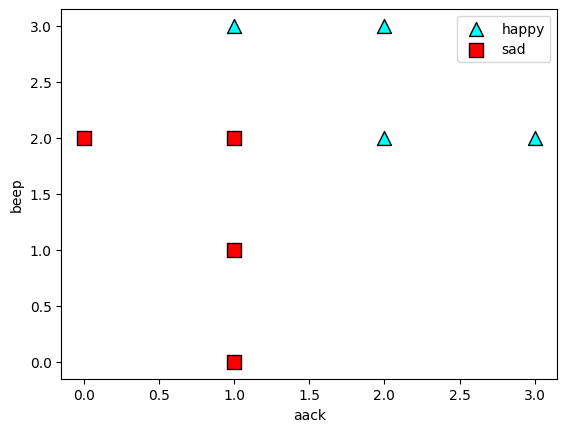

In [3]:
# Plotting the points
utils.plot_points(features, labels)

# Uncomment the following line to see a good line fit for this data.
#utils.draw_line(1,1,-3.5)

### Logistic regression

In [4]:
def sigmoid(x):
    # Note, in the book it appears as 1/(1+np.exp(-x)). Both expressions are equivalent, but the expression
    # below behaves better with small floating point numbers.
    return np.exp(x)/(1+np.exp(x))

def score(weights, bias, features):
    return np.dot(weights, features) + bias

def prediction(weights, bias, features):
    return sigmoid(score(weights, bias, features))

def log_loss(weights, bias, features, label):
    pred = 1.0*prediction(weights, bias, features)
    return -label*np.log(pred) - (1-label)*np.log(1-pred)

def total_log_loss(weights, bias, features, labels):
    total_error = 0
    for i in range(len(features)):
        total_error += log_loss(weights, bias, features[i], labels[i])
    return total_error

In [5]:
# Alternate way of writing log-loss

def soft_relu(x):
    return np.log(1+np.exp(x))

def alternate_log_loss(weights, bias, features, label):
    pred = prediction(weights, bias, features)
    return soft_relu((pred-label)*score(weights, bias, features))

def total_alternate_log_loss(weights, bias, features, labels):
    total_error = 0
    for i in range(len(features)):
        total_error += log_loss(weights, bias, features[i], labels[i])
    return total_error

In [6]:
def logistic_trick(weights, bias, features, label, learning_rate = 0.01):
    pred = prediction(weights, bias, features)
    for i in range(len(weights)):
        weights[i] += (label-pred)*features[i]*learning_rate
    bias += (label-pred)*learning_rate
    return weights, bias

In [7]:
def logistic_regression_algorithm(features, labels, learning_rate = 0.01, epochs = 1000):
    utils.plot_points(features, labels)
    weights = [1.0 for i in range(len(features[0]))]
    bias = 0.0
    errors = []
    for i in range(epochs):
        # Comment the following line of code to remove the plots of all the classifiers
        utils.draw_line(weights[0], weights[1], bias, color='grey', linewidth=0.1, linestyle='dotted')
        errors.append(total_log_loss(weights, bias, features, labels))
        j = random.randint(0, len(features)-1)
        weights, bias = logistic_trick(weights, bias, features[j], labels[j])
    utils.draw_line(weights[0], weights[1], bias)
    plt.show()
    plt.scatter(range(epochs), errors)
    plt.xlabel('epochs')
    plt.ylabel('error')
    print(errors[-1])
    return weights, bias

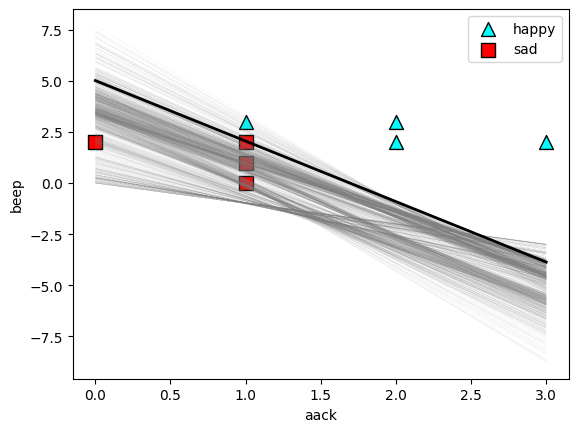

3.3394216083627706


([0.8899830825558325, 0.3005469916362577], -1.5079881179349839)

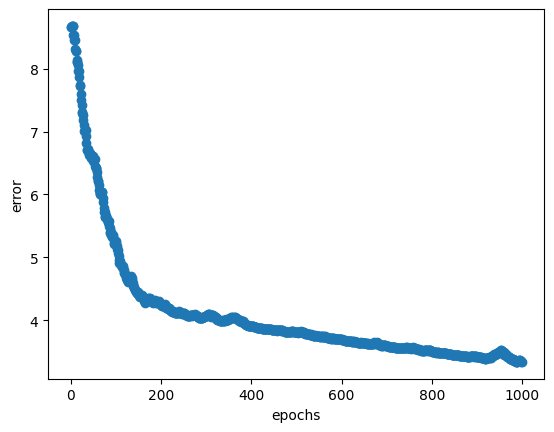

In [8]:
logistic_regression_algorithm(features, labels)

# Logistic regression using Turi Create

In [9]:
import turicreate as tc

data = tc.SFrame({'x1': features[:,0], 'x2': features[:,1], 'y': labels})
data

ModuleNotFoundError: No module named 'turicreate'

In [ ]:
classifier = tc.logistic_classifier.create(data,
                                           features = ['x1', 'x2'],
                                           target = 'y',
                                           validation_set=None)

In [ ]:
print("Model coefficients", classifier.coefficients)

In [ ]:
intercept, w1, w2 = classifier.coefficients['value']

utils.plot_points(features, labels)
utils.draw_line(w1, w2, intercept)